`%lsmagic` is a magic command that will list all the others<br>
`quickref` is another magic command that outputs a bunch of IPython help<br>
`len? # view docstring`<br>
`len?? # view source code`<br>

What follows is more clearly documented here: http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb, nay, here: http://localhost:8888/notebooks/scientific-python-lectures/Lecture-4-Matplotlib.ipynb

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(0, 5, 10)
y = x ** 2

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots.  However, **I'd encourrage not using the MATLAB compatible API for anything but the simplest figures**.  The main idea with object-oriented programming (matplotlib's other API) is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API).

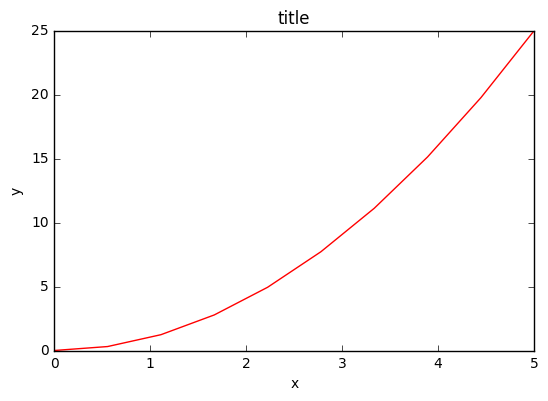

In [3]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

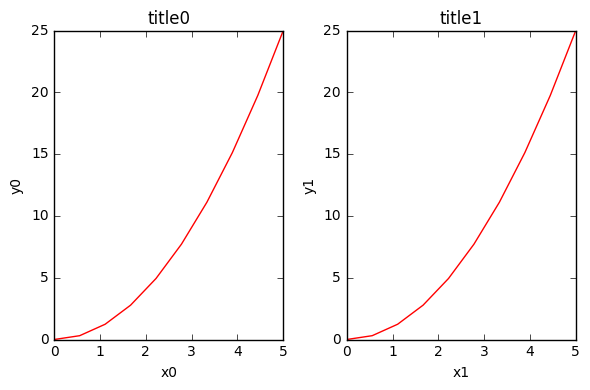

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for i, ax in enumerate(axes):
    ax.plot(x, y, 'r')
    ax.set_xlabel('x{}'.format(i))
    ax.set_ylabel('y{}'.format(i))
    ax.set_title('title{}'.format(i))
    
# automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content
fig.tight_layout()

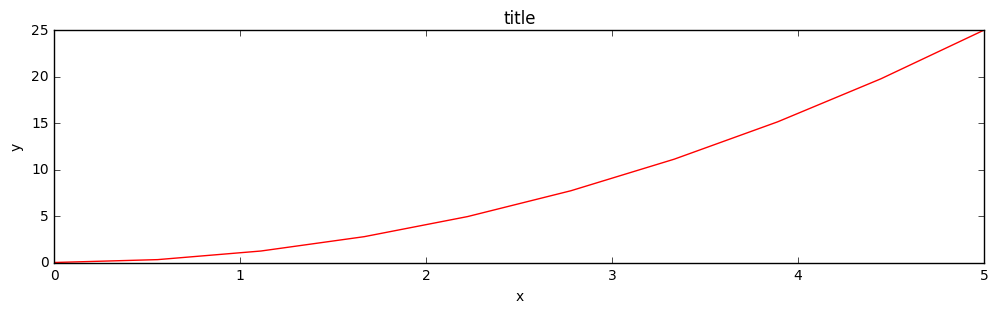

In [5]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [6]:
fig.savefig("savefig.png", dpi=200)

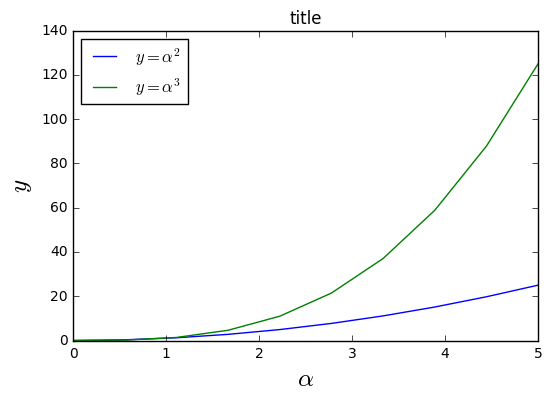

In [7]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)  # LaTeX!
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are shown below.

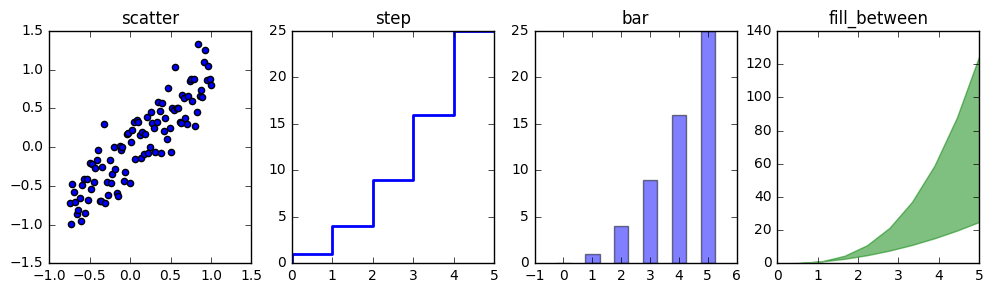

In [8]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");



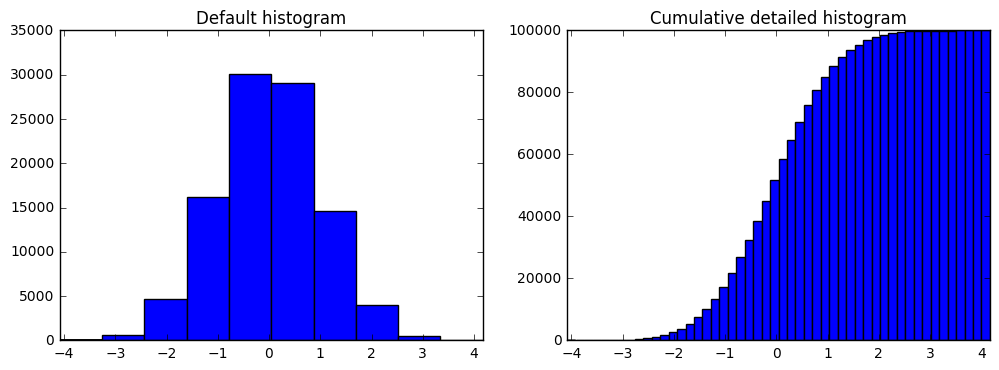

In [9]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

In [12]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

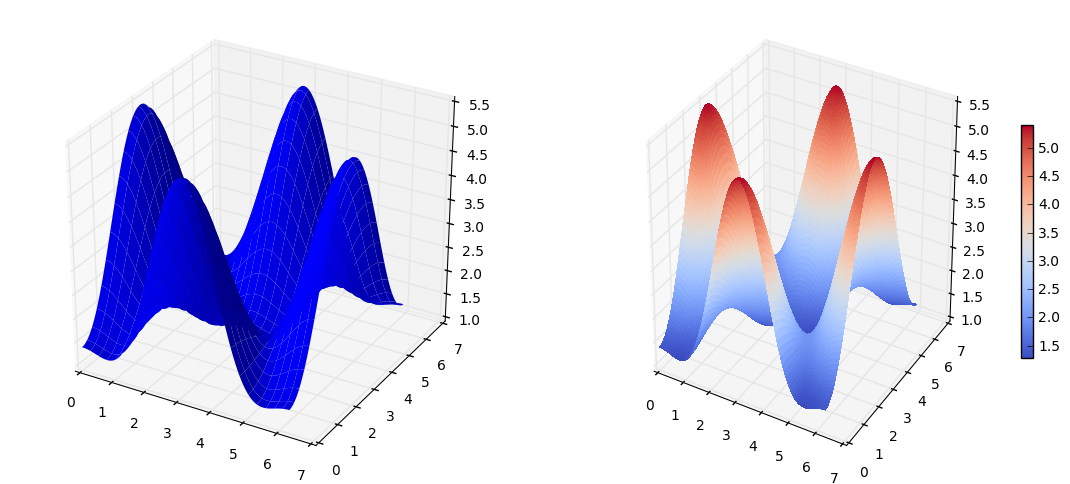

In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)